In [ ]:
!pip install py-linq
!python --version
from py_linq import Enumerable
from scipy import constants
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=138c69a03c14fcf85878a7d99fd1ab918e3ee27835df0a4e40d5466f0940be65
  Stored in directory: /root/.cache/pip/wheels/5e/a9/47/f118e66afd12240e4662752cc22cefae5d97275623aa8ef57d
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 1.0.0
    Uninstalling future-1.0.0:
      Successfully uninstalled future-1.0.0
Python 3.10.12


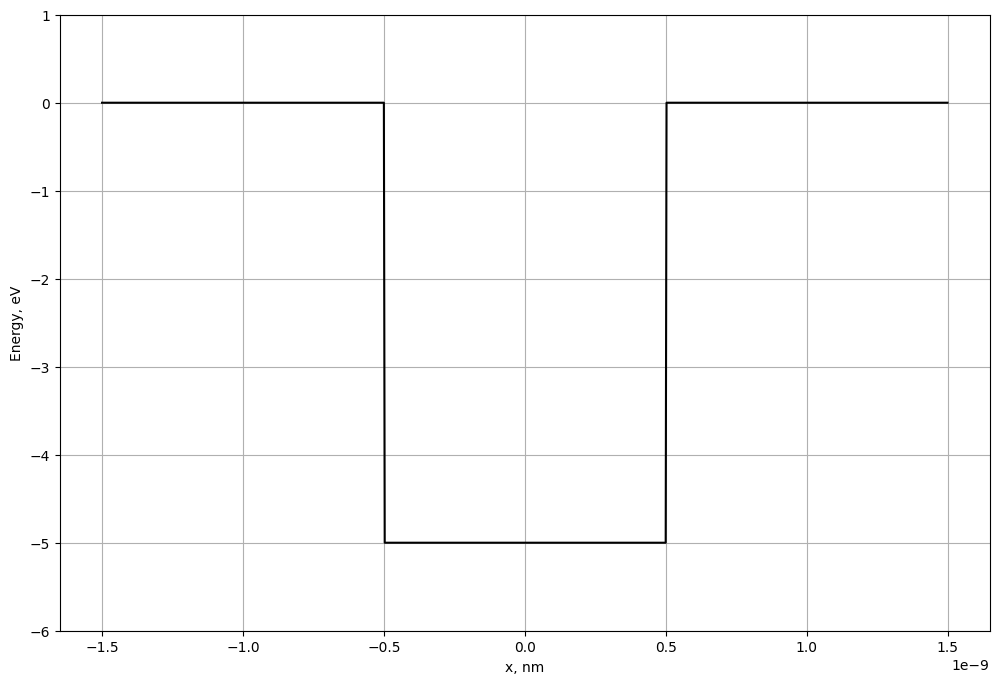

In [ ]:
eps = int(1e7)
hbar = 1.0545718e-34
eV = 1.60218e-19
m = 9.10938356e-31
a = 1e-9
U0 = 5 * eV
L = 3 * a
N = 1000

x = np.linspace(-L / 2, L / 2, N)
dx = x[1] - x[0]

y = []

for i in range(len(x)):
    y.append(-U0 if - a/2 <= x[i] <= a/2 else 0)

plt.figure(figsize=(12, 8))
plt.xlabel("x, nm")
plt.ylabel("Energy, eV")
plt.plot(x, V / eV, color='black', label='V(x)')
plt.ylim(-U0 / eV - 1, 1)
plt.grid()
plt.show()

max n: 4


<ipython-input-59-de93554f203c>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(point[0], point[1], 'go', color='blue')


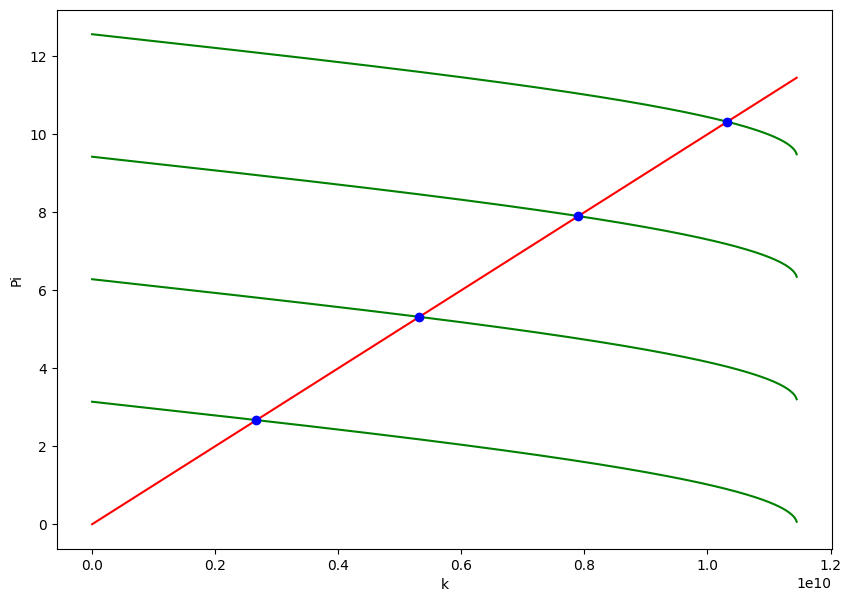

In [ ]:
k_2max = math.sqrt(2 * m * U0) / hbar

plt.figure(figsize=(10, 7))

lefty = np.arange(0, k_2max, eps, dtype=float) * a
leftx = np.arange(0, k_2max, eps)

plt.plot(leftx, lefty, color='red')


n_max = math.ceil(k_2max * a / constants.pi)
print(f"max n: {n_max}")
intsec = []


def intersect(x1, x2, y1, y2, eps):
    points = []
    for i in range(len(x1)):
        dist = math.sqrt((x1[i] - x2[i]) ** 2 + (y1[i] - y2[i]) ** 2)
        if dist <= eps:
            points.append((x1[i], y1[i], dist))

    points = Enumerable(points)
    min_dist = points.select(lambda x: x[2]).min()
    min_point = points.where(lambda x: x[2] == min_dist).first()
    return (min_point[0], min_point[1])


for n in range(1, n_max + 1):
    rightx = []
    righty = []
    for j in range(0, int(k_2max), eps):
        rightx.append(j)
        righty.append(constants.pi * n - 2 * math.asin((hbar * j) / math.sqrt(2 * m * U0)))

    plt.plot(rightx, righty, color='green')
    point = intersect(leftx, rightx, lefty, righty, eps)
    plt.plot(point[0], point[1], 'go', color='blue')
    intsec.append((point[0], point[1]))

plt.xlabel("k")
plt.ylabel("Pi")
plt.show()

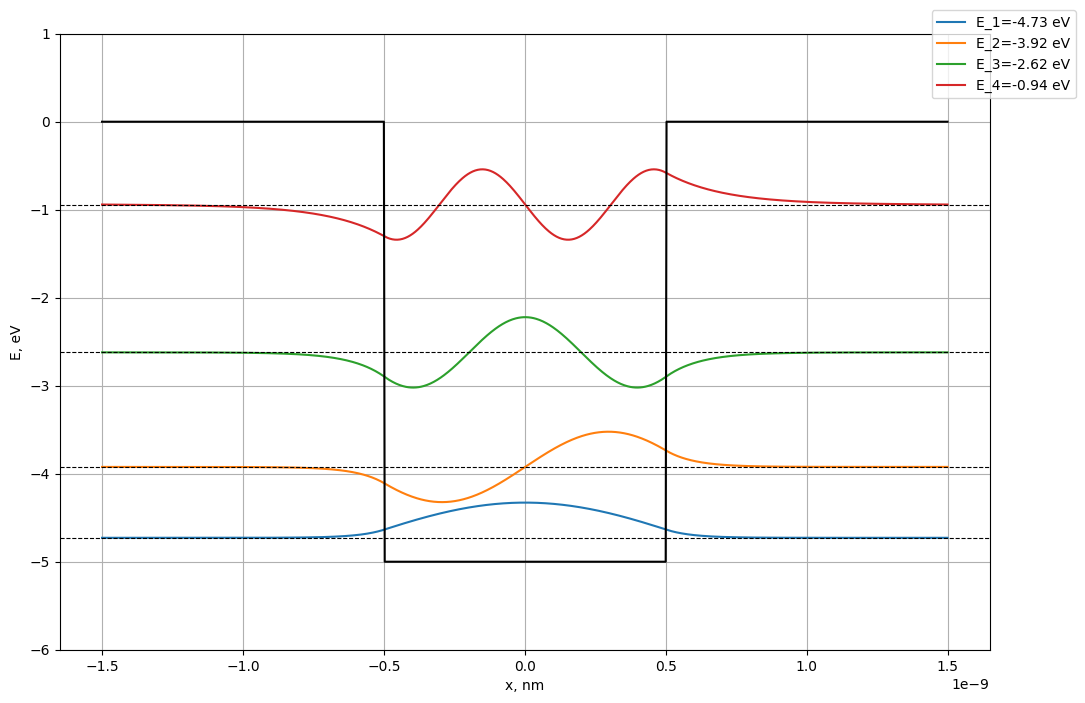

In [ ]:
V = np.where(np.abs(x) < a / 2, -U0, 0)

diag = hbar**2 / (2 * m * dx**2)

H = np.diag(2 * diag + V) + np.diag(-diag * np.ones(N - 1), k=-1) + np.diag(-diag * np.ones(N - 1), k=1)

eigvals, eigvecs = eigh(H)
energies = eigvals / eV
eigvecs = eigvecs / np.sqrt(dx)

bound_states_mask = energies < 0
bound_energies = energies[bound_states_mask]
bound_eigvecs = eigvecs[:, bound_states_mask]


plt.figure(figsize=(12, 8))
for i in range (n_max):
    plt.plot(
        x,
        bound_eigvecs[:, i] / np.max(np.abs(bound_eigvecs[:, i])) * 0.4 + bound_energies[i],
        label=f"E_{i+1}={bound_energies[i]:.2f} eV"
        )
    plt.axhline(bound_energies[i], color='black', linestyle='--', linewidth=0.8)

plt.legend(
    loc="upper right",
    fontsize=10,
    bbox_to_anchor=(1.1, 1.05)
)

plt.plot(x, V / eV, color='black', label='V(x)')
plt.xlabel("x, nm")
plt.ylabel("E, eV")
plt.ylim(-U0 / eV - 1, 1)
plt.grid()
plt.show()